# 实验二 线性系统根轨迹研究


已知单位负反馈系统的开环传递函数如下，可以使用相关命令建立系统的传递函数模型

$$
G(s)=\frac{K(x+2)}{(s^2 + 4s +5)^2}
$$

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np;

num=np.array([1,2])
den=np.convolve([1,4,5],[1,4,5])
G=tf(num,den)

## 1、绘制闭环系统根轨迹

向[control.matlab.rlocus](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.rlocus.html)传入开环传递函数G，函数将计算单位负反馈时的闭环系统特征方程$1+kG=0$的根轨迹，
并绘制根轨迹图。
从图中可以看出，**闭环系统**的根轨迹图有如下特点：

1. 根轨迹起于开环极点（包括无限极点），终于开环零点（包括无限零点）
2. 根轨迹的分支数等于max{开环极点数，开环零点数}，根轨迹对称于实轴
3. 更多可以参考[根轨迹绘制法则](https://baike.baidu.com/item/根轨迹/8322211?fr=aladdin)

poles of G: [-2.+1.00000005j -2.-1.00000005j -2.+0.99999995j -2.-0.99999995j]
zeros of G: [-2.]
branchs: 4


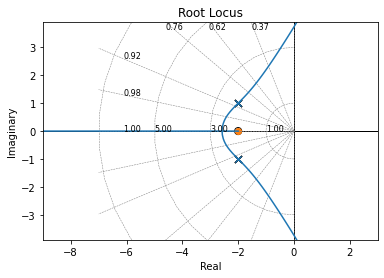

In [2]:
p,z=pzmap(G)
print("poles of G:",p)
print("zeros of G:",z)
print("branchs:",max([p.shape[0],z.shape[0]]))
rlocus(G)
plt.show()

## 2、闭环系统临界稳定增益

闭环系统根轨迹与虚轴的交点对应的增益值，为临界稳定增益，绘制闭环系统阶跃响应图可以观察到**等幅震荡**

In [3]:
#与虚轴的交点，临界稳定点
klist=np.linspace(1,100,100000)
rlist,klist=rlocus(G,kvect=klist,plot=False)
CriticalStableGain=[]
for i in range(rlist.shape[1]):
    branch=rlist[:,i]
    absmin=abs(branch.real).min()
    if(absmin<0.01):
        idx=np.argmin(abs(branch.real))
        k=klist[idx]
        CriticalStableGain.append(k)
        print('position:{:.2f},  gain:{:}'.format(branch[idx],k))


position:-0.00-3.73j,  gain:71.5540455404554
position:-0.00+3.73j,  gain:71.5540455404554


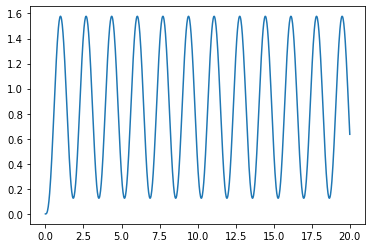

In [4]:
k = CriticalStableGain[0]
Phi=feedback(k*G,1)
y,t=step(Phi,20)
plt.plot(t,y)
plt.show()

## 3、添加零点或极点对系统性能的影响

以二阶系统为例开环传递函数

$$
G_2(s)=\frac{1}{s^2+0.6s}
$$

In [5]:
num=1
den=[1,0.6,0]
G2=tf(num,den)
Phi2=feedback(G2,1)

### 3.3添加零点后系统阶跃响应

在上述系统中添加零点`-4.87`，可以观察到系统的阶跃响应得到了良好的改善。

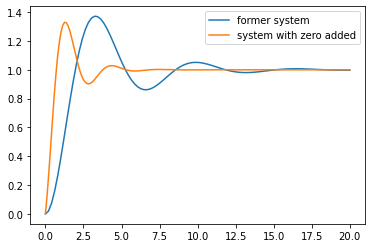

In [6]:
add=-4.87
G2z=G2*tf([1,-add],1)
Tfinal=20
Phi2z=feedback(G2z,1)
y,t=step(Phi2,T=Tfinal)
yz,tz=step(Phi2z,T=Tfinal)
plt.plot(t,y,label='former system')
plt.plot(tz,yz,label='system with zero added')
plt.legend()
plt.show()

In [7]:
info=stepinfo(Phi2)
info2=stepinfo(Phi2z)
keys=['RiseTime','SettlingTime','Overshoot','PeakTime']
print('Property\tFormer\tCurrent')
for key in keys:
    print(" %s\t %.2f\t %.2f" % (key,info[key],info2[key]))

Property	Former	Current
 RiseTime	 1.16	 0.52
 SettlingTime	 11.40	 4.80
 Overshoot	 37.21	 33.09
 PeakTime	 3.26	 1.31
